Requirement : 


    We will analyze the how many students are having good performance and how many are having bad performance.
    We will find number of students who are fail and number of students who are pass 
    
    

Data Source: https://www.kaggle.com/spscientist/students-performance-in-exams

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
data['gender'].value_counts()


female    518
male      482
Name: gender, dtype: int64

#### Data Cleaning

In [70]:
print("Is there any null value in the dataset:",data.isnull().values.any())

Is there any null value in the dataset: False


#### let's check any missing value

In [71]:
print("We need to check null details:",data.isnull().sum())

We need to check null details: gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


#### Size of data Frame

In [72]:
print(data.shape)

(1000, 8)


#### let's understand the basic information of data frame

In [73]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### let's take the min and max marks for math_score,reading_score and writing_score

In [74]:
data['math score'].min()

0

In [75]:
data['math score'].max()

100

In [76]:
data['reading score'].min()

17

In [77]:
data['reading score'].max()

100

In [78]:
data['writing score'].min()

10

In [79]:
data['writing score'].max()

100

#### let's take passing marks 35

In [80]:
pass_marks = 35

#### Let's understand bar chart between math score and students

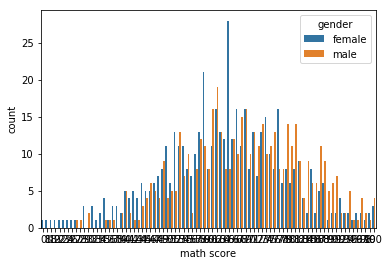

In [81]:
import seaborn as sns
p = sns.countplot(x="math score", hue = "gender", data=data)


Observation:
    
    There is x-axis shows math score and y axis shows the count from 0 to 25

#### Let's understand bar chart between writing score and students

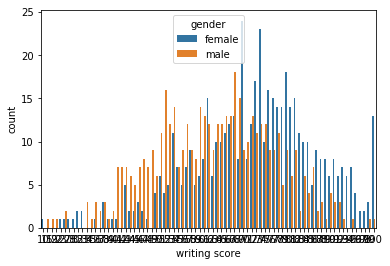

In [82]:
import seaborn as sns
p = sns.countplot(x="writing score", hue = "gender", data=data)


#### Let's understand bar chart between reading score and students

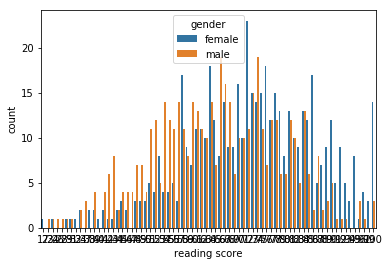

In [83]:
import seaborn as sns
p = sns.countplot(x="reading score", hue = "gender", data=data)


#### How many students passed in Math Exam

In [84]:
data['MathPassStatus'] = np.where(data['math score']<pass_marks,'Fail','Pass')
data['MathPassStatus'].value_counts()

Pass    978
Fail     22
Name: MathPassStatus, dtype: int64

We found total passed students : 978 and failed : 22

#### How many students passed in Writing Exam

In [85]:
data['WritingPassStatus'] = np.where(data['writing score']<pass_marks,'Fail','Pass')
data['WritingPassStatus'].value_counts()

Pass    983
Fail     17
Name: WritingPassStatus, dtype: int64

We found total Passed students : 983 and failed :17

#### How many students passed in Reading

In [86]:
data['ReadingPassStatus'] = np.where(data['reading score']<pass_marks,'Fail','Pass')
data['ReadingPassStatus'].value_counts()

Pass    985
Fail     15
Name: ReadingPassStatus, dtype: int64

We found total Passed students : 985 and failed : 15

#### Let's understand number of passed and failed students based on parental level of education in Math Exam

[None, None, None, None, None, None, None, None, None, None, None, None]

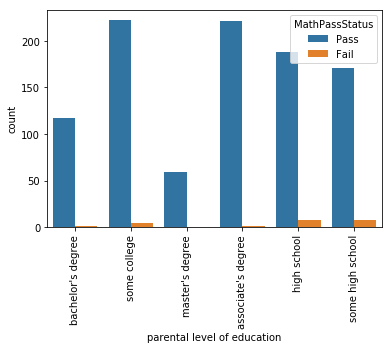

In [87]:
p=sns.countplot(x="parental level of education",hue = 'MathPassStatus',data = data)
plt.setp(p.get_xticklabels(), rotation=90) 

Highest pass students belong to some college as parental level of education 

#### Let's understand number of passed and failed students based on parental level of education in Writing Exam

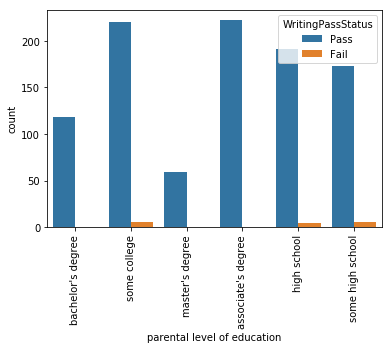

In [88]:
p=sns.countplot(x="parental level of education",hue = 'WritingPassStatus',data = data)
_= plt.setp(p.get_xticklabels(), rotation=90) 

Highest Passed students in writing exam belong to associate's degree

#### Let's understand number of passed and failed students based on parental level of education in Reading

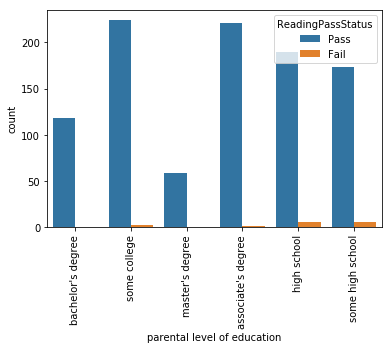

In [89]:
p=sns.countplot(x="parental level of education",hue = 'ReadingPassStatus',data = data)
_= plt.setp(p.get_xticklabels(), rotation=90) 

#### let check how many students are passed in all subjects

In [90]:
data['Overall_passStudents'] = data.apply(lambda x : 'Fail' if x['MathPassStatus'] == 'Fail' or x['WritingPassStatus'] == 'Fail'
                                          or x['ReadingPassStatus'] == 'Fail' else 'Pass',axis = 1)
data['Overall_passStudents'].value_counts()

Pass    971
Fail     29
Name: Overall_passStudents, dtype: int64

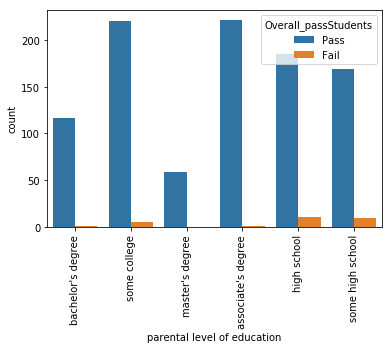

In [91]:
p = sns.countplot(x='parental level of education',hue = 'Overall_passStudents',data= data)
_ = plt.setp(p.get_xticklabels(),rotation=90)

#### Find the percentage of Marks

In [92]:
data['total_marks'] = data['math score']+data['writing score']+data['reading score']
data['percentage'] = data['total_marks']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,MathPassStatus,WritingPassStatus,ReadingPassStatus,Overall_passStudents,total_marks,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,Pass,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,Pass,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,Pass,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,Pass,148,49.333333
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,Pass,229,76.333333


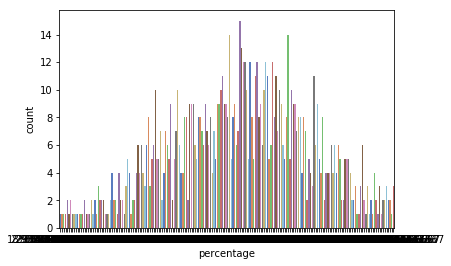

In [93]:
p = sns.countplot(x='percentage',data=data,palette = "muted")
_ = plt.setp(p.get_xticklabels(),rotation=0)


#### Let assign the grades


above 75 = A Grade

65 to 75 = B Grade

55 to 65 = C Grade

45 to 55 = D Grade

35 to 45 = E Grade

below 35 = Fail Grade

In [95]:
def GetGrade(percentage,Overall_passStudents):
    if (Overall_passStudents == 'F'):
        return 'F'
    if (percentage>=75):
        return 'A'
    if (percentage>=65):
        return 'B'
    if (percentage>=55):
        return 'C'
    if (percentage>=45):
        return 'D'
    if (percentage>=35):
        return 'E'
    else:
        return 'Fail'
data['Grade'] = data.apply(lambda x : GetGrade(x['percentage'], x['Overall_passStudents']), axis=1)

data.Grade.value_counts()    

A       324
B       277
C       208
D       137
E        36
Fail     18
Name: Grade, dtype: int64

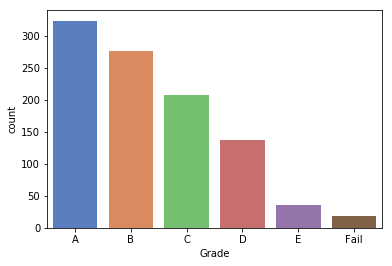

In [97]:
p = sns.countplot(x= 'Grade',data=data,order = ['A','B','C','D','E','Fail'],palette = "muted")
plt.show()

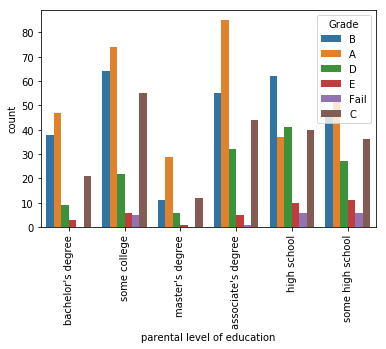

In [98]:
p = sns.countplot(x= 'parental level of education',hue = 'Grade',data=data)
_ = plt.setp(p.get_xticklabels(),rotation=90)